In [1]:
import pandas as pd

# Load the dataset
file_path = 'final_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head(), df.info(), df.describe(include='all')

/tmp/ipykernel_69841/1411663530.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780309 entries, 0 to 780308
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   At İsmi   780309 non-null  object
 1   Irk       780309 non-null  object
 2   Cinsiyet  780309 non-null  object
 3   Yaş       780309 non-null  object
 4   Şehir     753760 non-null  object
 5   Mesafe    753760 non-null  object
 6   Derece    753627 non-null  object
 7   details   780309 non-null  object
dtypes: object(8)
memory usage: 47.6+ MB


(  At İsmi      Irk Cinsiyet      Yaş     Şehir  Mesafe   Derece  \
 0   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2200.0  2.19.23   
 1   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2000.0  2.04.76   
 2   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2000.0  2.09.46   
 3   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2100.0  2.12.00   
 4   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2100.0  2.14.02   
 
                                              details  
 0  https://www.tjk.org/TR/YarisSever/Query/Connec...  
 1  https://www.tjk.org/TR/YarisSever/Query/Connec...  
 2  https://www.tjk.org/TR/YarisSever/Query/Connec...  
 3  https://www.tjk.org/TR/YarisSever/Query/Connec...  
 4  https://www.tjk.org/TR/YarisSever/Query/Connec...  ,
 None,
           At İsmi      Irk Cinsiyet       Yaş     Şehir    Mesafe  Derece  \
 count      780309   780309   780309    780309    753760  753760.0  753627   
 unique      63539        2        2       233        26      65.0   14215   
 top     ABH

In [2]:
# Remove rows where "Derece" is missing or "Drcsz"
df_cleaned = df[~df['Derece'].isin(['Drcsz', None, 'NONE'])]

# Remove rows with missing "Şehir" or "Mesafe"
df_cleaned = df_cleaned.dropna(subset=['Şehir', 'Mesafe'])

# Convert "Derece" to milliseconds
def convert_to_milliseconds(derece):
    if isinstance(derece, str):
        try:
            minutes, seconds, milliseconds = map(int, derece.split('.'))
            return (minutes * 60 * 1000) + (seconds * 1000) + milliseconds
        except ValueError:
            return None
    return None

df_cleaned['Derece_ms'] = df_cleaned['Derece'].apply(convert_to_milliseconds)

# Drop rows where conversion failed (if any)
df_cleaned = df_cleaned.dropna(subset=['Derece_ms'])

# Display the first few rows of the cleaned dataset
df_cleaned.head(), df_cleaned.info(), df_cleaned.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 740841 entries, 0 to 780306
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   At İsmi    740841 non-null  object 
 1   Irk        740841 non-null  object 
 2   Cinsiyet   740841 non-null  object 
 3   Yaş        740841 non-null  object 
 4   Şehir      740841 non-null  object 
 5   Mesafe     740841 non-null  object 
 6   Derece     740841 non-null  object 
 7   details    740841 non-null  object 
 8   Derece_ms  740841 non-null  float64
dtypes: float64(1), object(8)
memory usage: 56.5+ MB


(  At İsmi      Irk Cinsiyet      Yaş     Şehir  Mesafe   Derece  \
 0   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2200.0  2.19.23   
 1   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2000.0  2.04.76   
 2   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2000.0  2.09.46   
 3   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2100.0  2.12.00   
 4   ABDÜL  İngiliz    Erkek  3 y  de  İstanbul  2100.0  2.14.02   
 
                                              details  Derece_ms  
 0  https://www.tjk.org/TR/YarisSever/Query/Connec...   139023.0  
 1  https://www.tjk.org/TR/YarisSever/Query/Connec...   124076.0  
 2  https://www.tjk.org/TR/YarisSever/Query/Connec...   129046.0  
 3  https://www.tjk.org/TR/YarisSever/Query/Connec...   132000.0  
 4  https://www.tjk.org/TR/YarisSever/Query/Connec...   134002.0  ,
 None,
          At İsmi      Irk Cinsiyet       Yaş     Şehir    Mesafe   Derece  \
 count     740841   740841   740841    740841    740841  740841.0   740841   
 unique     38713       

In [3]:
import re

# Function to parse the "Yaş" column into numeric age and classification
def parse_yas(yas):
    # Extract numeric age (the part before 'y')
    age_match = re.search(r'(\d+)\sy', yas)
    age = int(age_match.group(1)) if age_match else None
    
    # Extract the classification symbols after 'y'
    classification_match = re.search(r'y\s*([a-zA-Z]{2})', yas.replace(" ", ""))
    classification = classification_match.group(1) if classification_match else None
    
    return age, classification

# Apply the function to create two new columns
df_cleaned['Age'], df_cleaned['Condition'] = zip(*df_cleaned['Yaş'].apply(parse_yas))

# Drop the original "Yaş" column as it has been parsed
df_cleaned = df_cleaned.drop(columns=['Yaş'])

# Display the first few rows of the cleaned and engineered dataset
print(df_cleaned.head())
print(df_cleaned[['Age', 'Condition']].describe(include='all'))


  At İsmi      Irk Cinsiyet     Şehir  Mesafe   Derece  \
0   ABDÜL  İngiliz    Erkek  İstanbul  2200.0  2.19.23   
1   ABDÜL  İngiliz    Erkek  İstanbul  2000.0  2.04.76   
2   ABDÜL  İngiliz    Erkek  İstanbul  2000.0  2.09.46   
3   ABDÜL  İngiliz    Erkek  İstanbul  2100.0  2.12.00   
4   ABDÜL  İngiliz    Erkek  İstanbul  2100.0  2.14.02   

                                             details  Derece_ms  Age Condition  
0  https://www.tjk.org/TR/YarisSever/Query/Connec...   139023.0    3        de  
1  https://www.tjk.org/TR/YarisSever/Query/Connec...   124076.0    3        de  
2  https://www.tjk.org/TR/YarisSever/Query/Connec...   129046.0    3        de  
3  https://www.tjk.org/TR/YarisSever/Query/Connec...   132000.0    3        de  
4  https://www.tjk.org/TR/YarisSever/Query/Connec...   134002.0    3        de  
                  Age Condition
count   740841.000000    740841
unique            NaN        17
top               NaN        da
freq              NaN    153457
mean 

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Convert "Cinsiyet" and "Irk" to single binary columns
df_cleaned['Cinsiyet'] = df_cleaned['Cinsiyet'].apply(lambda x: 1 if x == 'Erkek' else 0)
df_cleaned['Irk'] = df_cleaned['Irk'].apply(lambda x: 1 if x == 'İngiliz' else 0)

# Step 2: One-Hot Encode the "Condition" feature
df_encoded = pd.get_dummies(df_cleaned, columns=['Condition'])

# Step 3: Normalize numerical features
scaler = MinMaxScaler()
df_encoded[['Mesafe', 'Age', 'Derece_ms']] = scaler.fit_transform(df_encoded[['Mesafe', 'Age', 'Derece_ms']])

# Display the first few rows of the final prepared dataset
print(df_encoded.head())


  At İsmi  Irk  Cinsiyet     Şehir    Mesafe   Derece  \
0   ABDÜL    1         1  İstanbul  0.538462  2.19.23   
1   ABDÜL    1         1  İstanbul  0.461538  2.04.76   
2   ABDÜL    1         1  İstanbul  0.461538  2.09.46   
3   ABDÜL    1         1  İstanbul  0.500000  2.12.00   
4   ABDÜL    1         1  İstanbul  0.500000  2.14.02   

                                             details  Derece_ms       Age  \
0  https://www.tjk.org/TR/YarisSever/Query/Connec...   0.074676  0.018182   
1  https://www.tjk.org/TR/YarisSever/Query/Connec...   0.062544  0.018182   
2  https://www.tjk.org/TR/YarisSever/Query/Connec...   0.066578  0.018182   
3  https://www.tjk.org/TR/YarisSever/Query/Connec...   0.068976  0.018182   
4  https://www.tjk.org/TR/YarisSever/Query/Connec...   0.070601  0.018182   

   Condition_aa  ...  Condition_de  Condition_dg  Condition_dk  Condition_ka  \
0         False  ...          True         False         False         False   
1         False  ...          True

In [5]:
# print the first few rows of the dataset
df_encoded.head()

,At İsmi,Irk,Cinsiyet,Şehir,Mesafe,Derece,details,Derece_ms,Age,Condition_aa,...,Condition_de,Condition_dg,Condition_dk,Condition_ka,Condition_kd,Condition_ke,Condition_kg,Condition_kk,Condition_ya,Condition_yk
0,ABDÜL,1,1,İstanbul,0.538462,2.19.23,https://www.tjk.org/TR/YarisSever/Query/Connec...,0.074676,0.018182,False,...,True,False,False,False,False,False,False,False,False,False
1,ABDÜL,1,1,İstanbul,0.461538,2.04.76,https://www.tjk.org/TR/YarisSever/Query/Connec...,0.062544,0.018182,False,...,True,False,False,False,False,False,False,False,False,False
2,ABDÜL,1,1,İstanbul,0.461538,2.09.46,https://www.tjk.org/TR/YarisSever/Query/Connec...,0.066578,0.018182,False,...,True,False,False,False,False,False,False,False,False,False
3,ABDÜL,1,1,İstanbul,0.500000,2.12.00,https://www.tjk.org/TR/YarisSever/Query/Connec...,0.068976,0.018182,False,...,True,False,False,False,False,False,False,False,False,False
4,ABDÜL,1,1,İstanbul,0.500000,2.14.02,https://www.tjk.org/TR/YarisSever/Query/Connec...,0.070601,0.018182,False,...,True,False,False,False,False,False,False,False,False,False


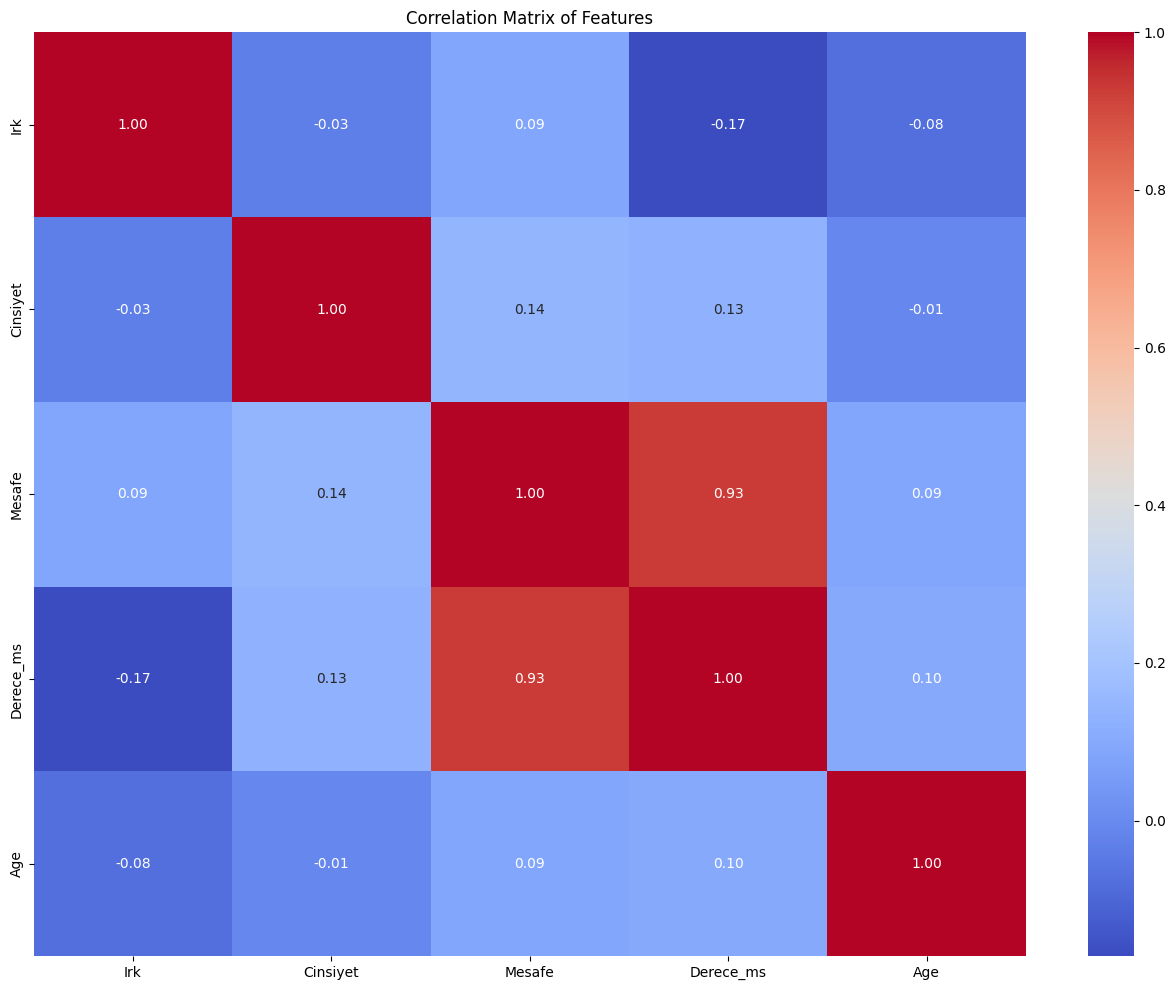

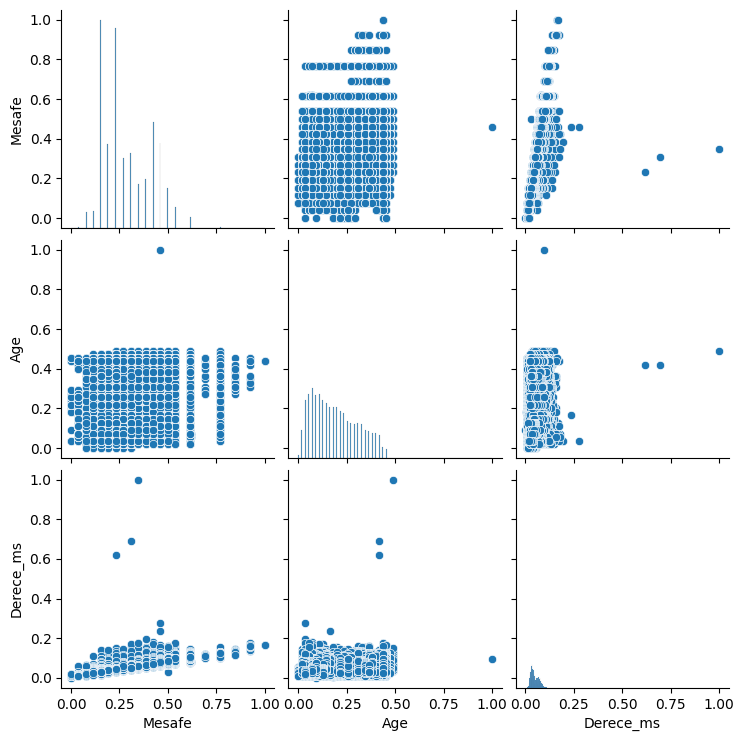

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns for correlation matrix
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

# Check correlation between numerical features and encoded features
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Analyzing interaction between "Mesafe" and other features
sns.pairplot(numeric_df[['Mesafe', 'Age', 'Derece_ms'] + [col for col in numeric_df.columns if 'Condition_' in col]])
plt.show()